In [1]:
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from pycbc import types, fft, waveform
import numpy as np
from multiprocessing import Pool
import time

In [2]:
hp,hc = get_td_waveform(approximant='IMRPhenomD',mass1=2,mass2=100,delta_t=1.0/4096,f_lower=1)

Text(0.5, 1.0, 'Time-Domain Wave-Form')

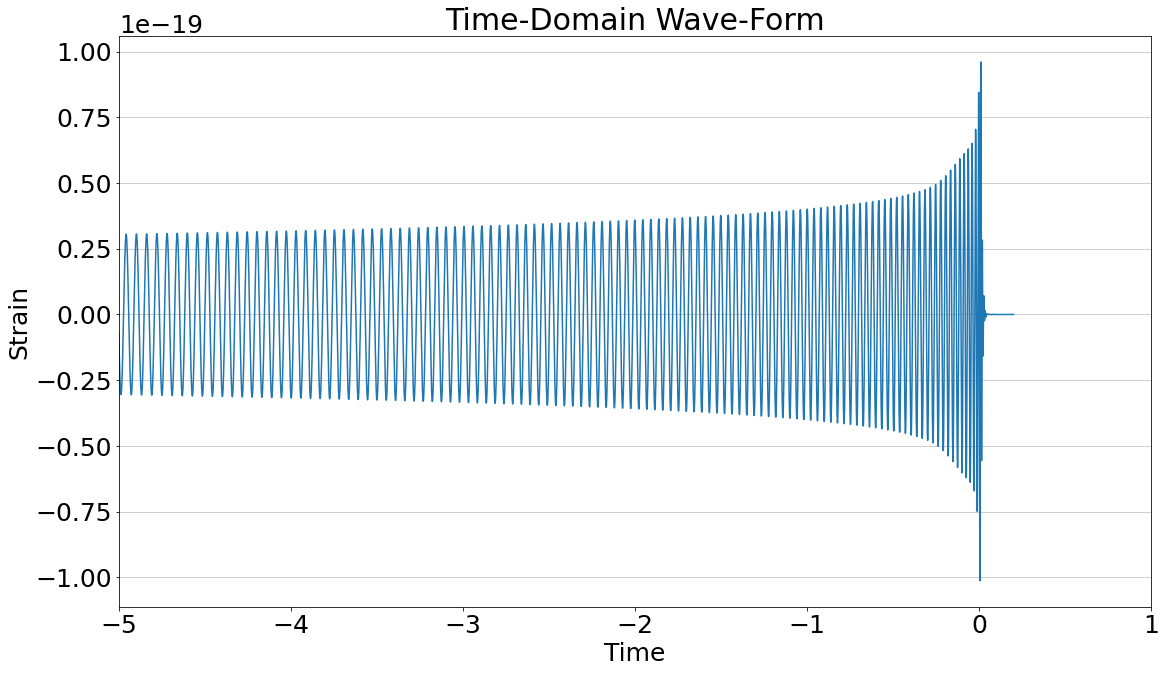

In [3]:
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(hp.sample_times, hp, label="IMRPhenomD")
plt.grid(axis='y', alpha=0.75)
ax.set_xlim(-5,1)
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title('Time-Domain Wave-Form')
#plt.yscale('log')
#plt.xscale('log')


In [2]:
# Get a frequency domain waveform #IMRPhenomD
minfreq=0.1
sptilde, sctilde = waveform.get_fd_waveform(approximant="IMRPhenomD",
                             mass1=50, mass2=250, delta_f=1.0/5000, f_lower=minfreq)

/home/rciancarella/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


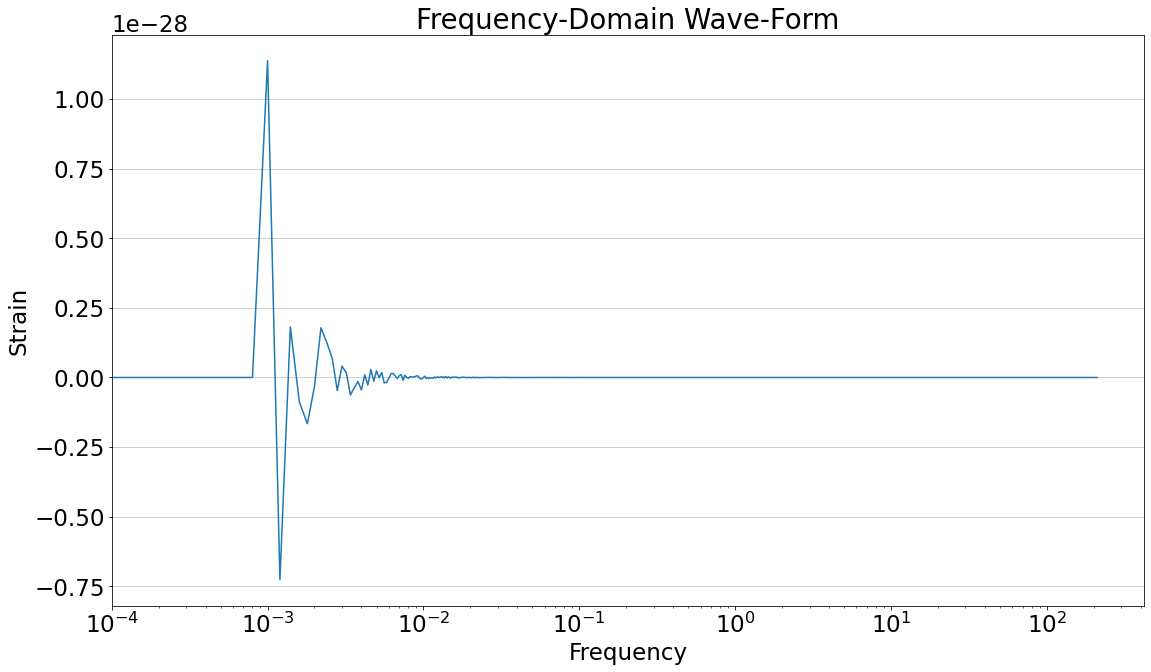

In [19]:
tildetest=sptilde*sptilde
plt.rcParams.update({'font.size': 23})
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(sptilde.sample_frequencies, abs(sptilde), label="TaylorF2 (IFFT)")
#ax.plot(sptilde.sample_frequencies, tildetest, label="TaylorF2 (IFFT)")
plt.grid(axis='y', alpha=0.75)
#ax.set_xlim(0.1,220)
plt.xlabel('Frequency')
plt.ylabel('Strain')
plt.title('Frequency-Domain Wave-Form')
#plt.yscale('log')
plt.xscale('log')

In [16]:
len(sptilde.sample_frequencies)

1048577

In [4]:
myfunc=lambda x:x**(-7/6)

In [5]:
#print(sptilde.at_frequency(1))
norm=abs(sptilde.at_frequency(minfreq))
print('Freq min={}, Normalization={}'.format(minfreq,norm))

Freq min=0.1, Normalization=4.9188964931680084e-17


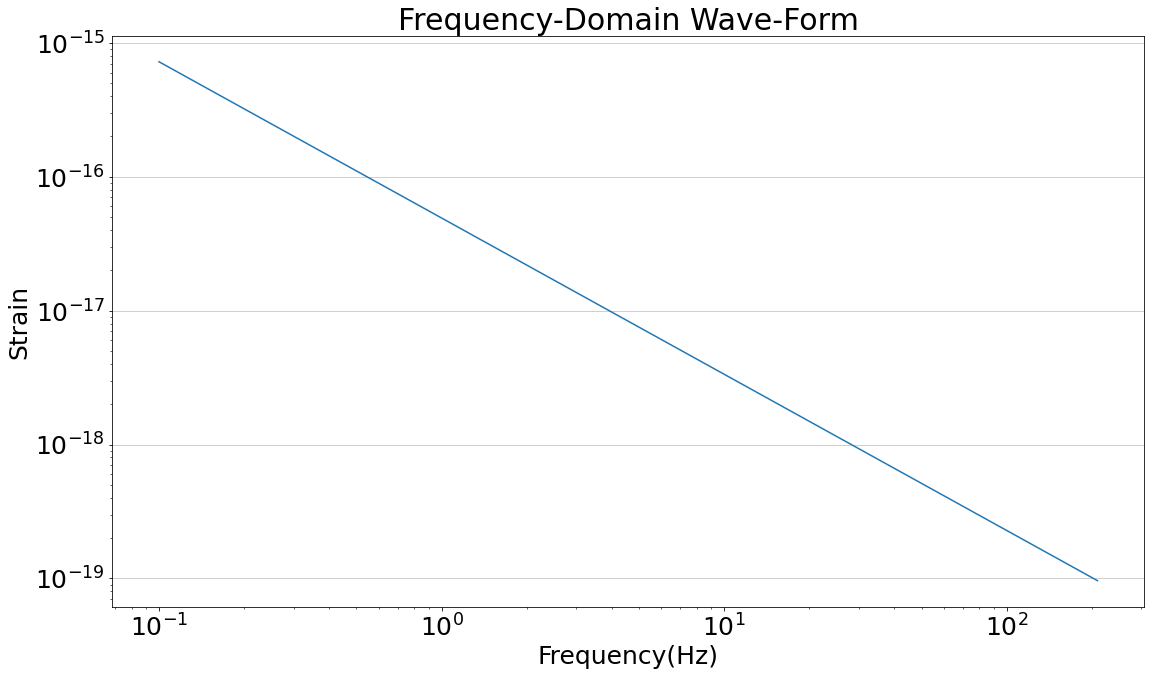

In [8]:
maxfreq=sptilde.sample_frequencies.max()
freq=np.linspace(minfreq,maxfreq,100000)
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#ax.plot(sptilde.sample_frequencies, abs(sptilde), label="IMRPhenomD")
ax.plot(freq,myfunc(freq)*norm, label="Expected")
plt.grid(axis='y', alpha=0.75)
#ax.set_xlim(10,30)
plt.xlabel('Frequency(Hz)')
plt.ylabel('Strain')
#plt.legend()
plt.title('Frequency-Domain Wave-Form')
plt.yscale('log')
plt.xscale('log')

In [6]:
maxfreq=sptilde.sample_frequencies.max()
freq=np.linspace(minfreq,maxfreq,100000)
values=np.zeros(len(freq))
for i in range(len(freq)):
    values[i]=abs(sptilde.at_frequency(freq[i]))**2

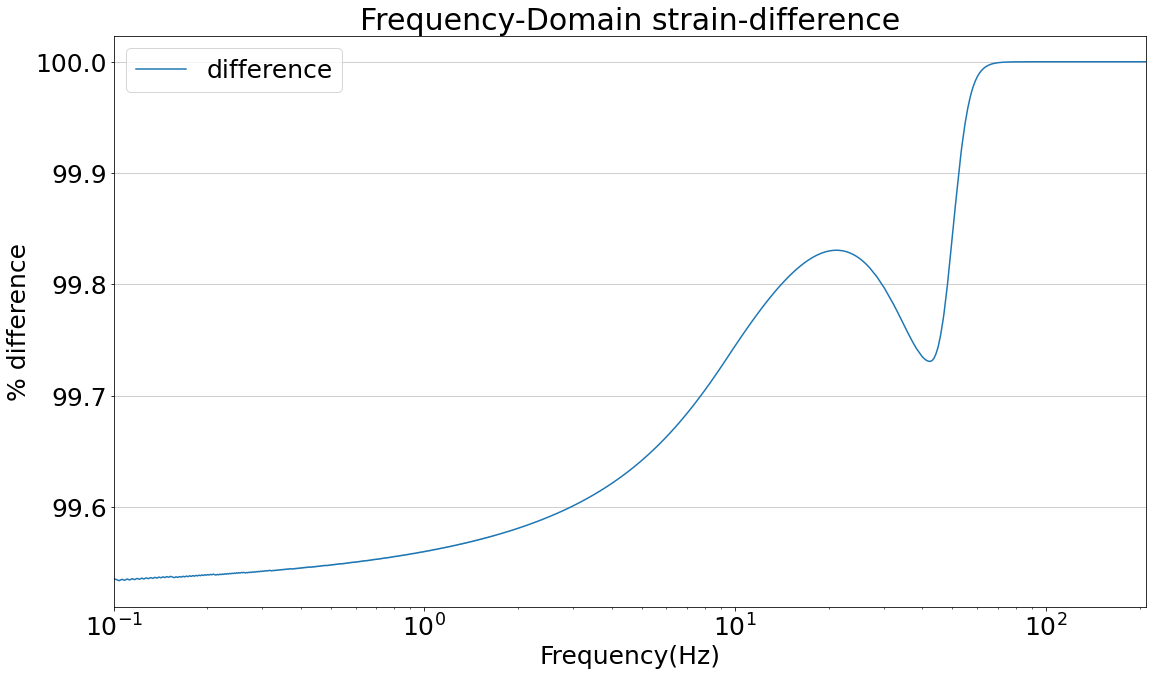

In [7]:
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#ax.plot(sptilde.sample_frequencies, abs(sptilde)-myfunc(sptilde.sample_frequencies)*norm, label="IMRPhenomD")
ax.plot(freq,100*((((myfunc(freq)*norm))**2-values)/((myfunc(freq)*norm))**2), label="difference")
plt.grid(axis='y', alpha=0.75)
ax.set_xlim(0.1,maxfreq)
plt.xlabel('Frequency(Hz)')
plt.ylabel('% difference')
plt.legend()
plt.title('Frequency-Domain strain-difference')
#plt.yscale('log')
plt.xscale('log')

In [11]:
print(all(values>=0),all(myfunc(freq)*norm>=0))

True True


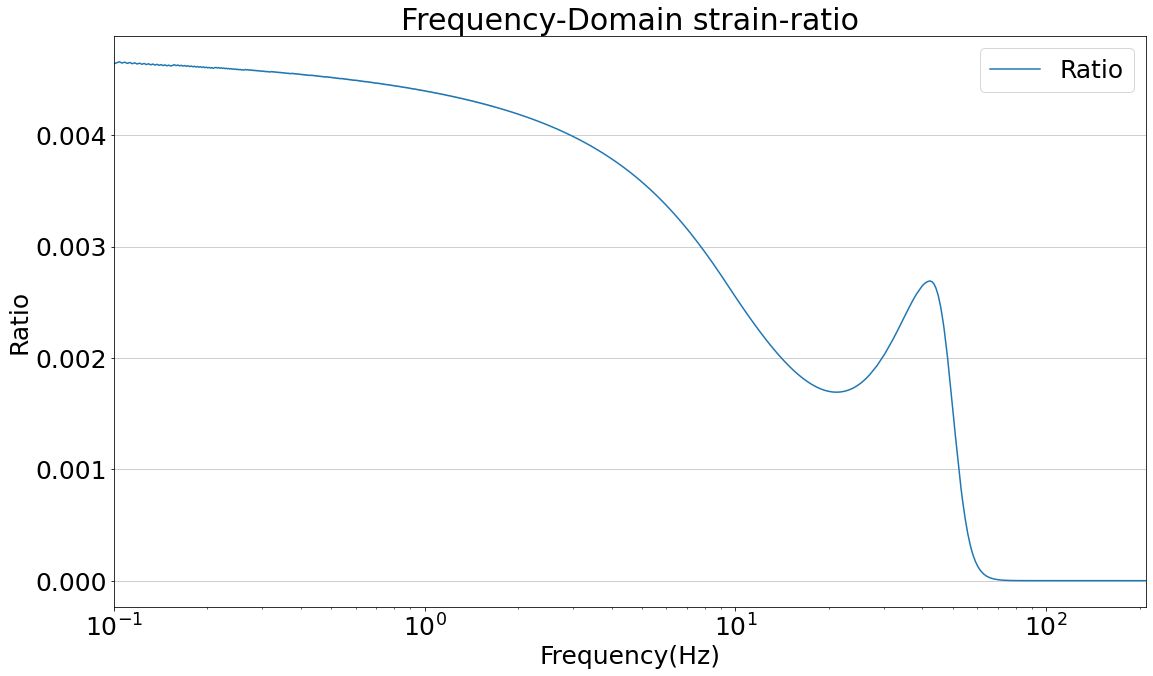

In [8]:
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#ax.plot(sptilde.sample_frequencies, abs(sptilde)-myfunc(sptilde.sample_frequencies)*norm, label="IMRPhenomD")
ax.plot(freq,((values)/((myfunc(freq)*norm))**2), label="Ratio")
plt.grid(axis='y', alpha=0.75)
ax.set_xlim(minfreq,maxfreq)
plt.xlabel('Frequency(Hz)')
plt.ylabel('Ratio')
plt.legend()
plt.title('Frequency-Domain strain-ratio')
#plt.yscale('log')
plt.xscale('log')

In [17]:
####---------------------Test----------------------###
NN=1000
#primarymasses=np.array([5,10,20,50])
primarymasses=np.linspace(5,500,NN)
dist=np.linspace(5,500,NN)
cos_i=np.random.uniform(-1,1,NN)
incl=np.arccos(cos_i)
from pycbc.waveform.generator import FDomainCBCGenerator
generator=FDomainCBCGenerator(variable_args=['mass1','mass2','distance','inclination'],delta_f=1.0/5000, f_lower=minfreq,
                                       approximant='IMRPhenomD')

In [ ]:
FDhp=np.zeros(len(primarymasses))
FDhc=np.zeros(len(primarymasses))
FDtot=[]
start_time = time.time()
for i in range(len(primarymasses)):
    FDtot.append(generator.generate(mass1=primarymasses[i],mass2=primarymasses[i],
                                    distance=dist[i],inclination=incl[i]))
end_time= time.time()
print("--- %s seconds ---" % ((time.time() - start_time)))